# A rectangle rotation puzzle

In [1]:
import math

import numpy as np
from media_tools import *
import cv2
import math
import matplotlib.pyplot as plt


Suppose you have a rectangle 2d array described by a `(h, w)` tuple.

In [2]:
rect = np.ones((100, 200))

Let's find the coordinates of the rectangle's points and return them as a list of tuples.

In [3]:
point_names = ['top_left', 'top_right', 'bottom_right', 'bottom_left']
rect_points = [(0, 0), (0, rect.shape[1] - 1), (rect.shape[0] - 1, rect.shape[1] - 1), (rect.shape[0] - 1, 0)]

# roll the points so that bottom_left is first
point_names = point_names[1:] + point_names[:1]
rect_points = rect_points[1:] + rect_points[:1]

# interweave the point names and points
print(np.array(list(zip(point_names, rect_points))))

[['top_right' (0, 199)]
 ['bottom_right' (99, 199)]
 ['bottom_left' (99, 0)]
 ['top_left' (0, 0)]]


## Rotating points by an angle around an origin:

Suppose you want to rotate the rectangle by $\theta$ degrees clockwise around an origin point. What would be the new coordinates of the rectangle's points?

In [4]:
theta = 45

# we need a function that takes a list of points and finds the middle point.
def find_middle(points):
    x_list = [x for (x, y) in points]
    y_list = [y for (x, y) in points]
    return [np.mean(x_list), np.mean(y_list)]

# we need a function that takes a list of points, a rotation angle, and an origin point and returns the coordinates of the rotated points on an array.
def rotate_points_around_origin(points, theta=0, origin=(0,0)):
    # if no origin is given, find the middle of the points
    if origin is "centre":
        origin = find_middle(points)
    # create a rotation matrix
    rot_mat = cv2.getRotationMatrix2D(origin, -theta, 1)
    # rotate the points and return the result as a list of tuples
    return [tuple(np.dot(rot_mat, (x, y, 1)).astype(int)) for (x, y) in points]

In [5]:
# let's print the original points for reference
print("Original points:\n", rect_points)

# let's get the rotated points for a rotation of 45 degrees at a few different origin points
new_points_45_around_center = rotate_points_around_origin(rect_points, theta, origin="centre")
new_points_45_around_bottom_left = rotate_points_around_origin(rect_points, theta, origin=rect_points[3])
new_points_45_around_bottom_right = rotate_points_around_origin(rect_points, theta, origin=rect_points[2])
new_points_45_around_top_right = rotate_points_around_origin(rect_points, theta, origin=rect_points[1])
new_points_45_around_top_left = rotate_points_around_origin(rect_points, theta, origin=rect_points[0])

# print the results
print("Rotated points, theta = {}, origin = {}:\n".format(theta, "centre"), new_points_45_around_center)
print("Rotated points, theta = {}, origin = {}:\n".format(theta, rect_points[0]), new_points_45_around_top_left)
print("Rotated points, theta = {}, origin = {}:\n".format(theta, rect_points[1]), new_points_45_around_top_right)
print("Rotated points, theta = {}, origin = {}:\n".format(theta, rect_points[2]), new_points_45_around_bottom_right)
print("Rotated points, theta = {}, origin = {}:\n".format(theta, rect_points[3]), new_points_45_around_bottom_left)

Original points:
 [(0, 199), (99, 199), (99, 0), (0, 0)]
Rotated points, theta = 45, origin = centre:
 [(-55, 134), (14, 204), (154, 64), (84, -5)]
Rotated points, theta = 45, origin = (0, 199):
 [(0, 199), (70, 269), (210, 128), (140, 58)]
Rotated points, theta = 45, origin = (99, 199):
 [(28, 128), (99, 198), (239, 58), (169, -11)]
Rotated points, theta = 45, origin = (99, 0):
 [(-111, 70), (-41, 140), (99, 0), (28, -70)]
Rotated points, theta = 45, origin = (0, 0):
 [(-140, 140), (-70, 210), (70, 70), (0, 0)]


## Drawing polygons from points:

Additionally, if we are going to draw the shapes, rotated, we need some functions to draw polygons.

In [126]:
# draw a polygon centered at an origin using cv2.fillPoly
def draw_poly(points, origin=(0,0), colour=(255, 255, 255, 255)):
    # if no origin is given, find the middle of the points
    if origin is "centre":
        origin = np.floor(np.asarray(find_middle(points))).astype(int)
    # subtract the origin from each point
    print(points)
    # points = np.subtract(points, origin)
    # subtract the smallest x and y values from each point
    # points = np.subtract(points, np.min(points, axis=0))
    # create an empty array to hold the polygon (must contain the max, and min x and y values, alpha must be 1)
    poly_array = np.zeros((np.max(points, axis=0)[1] + 1, np.max(points, axis=0)[0] + 1, 4), dtype=np.uint8)
    poly_array[:, :, 3] = 255
    # add the origin back to each point
    # points = np.add(points, origin)
    # fill the empty array with the polygon
    cv2.fillPoly(poly_array, [points], colour)
    # return the filled array
    return poly_array


In [127]:
# given two points on an equilateral triangle, find the coordinates of the last point
equilateral_triangle_points = ((0, 0), (0, 100), tuple(np.floor(np.asarray((np.sqrt(100**2 - (100/2)**2), 100/2))).astype(int)))

# draw the equilateral triangle
equilateral_triangle = draw_poly(equilateral_triangle_points, colour=(0, 255, 255, 255))
image_tools.show_image(equilateral_triangle, axis=True, title="Equilateral triangle")

((0, 0), (0, 100), (86, 50))


error: OpenCV(4.5.3) :-1: error: (-5:Bad argument) in function 'fillPoly'
> Overload resolution failed:
>  - pts is not a numerical tuple
>  - Expected Ptr<cv::UMat> for argument 'pts'


## Showing images with alpha channels:

For added convenience, we also want to make sure we can set different opacity levels for the polygons.

pixel: [[array([  0, 255, 255, 127], dtype=uint8)]] 
pixel2: [[array([255,   0, 255,  63], dtype=uint8)]] 
pixel3: [[[127 127 255  95]]]


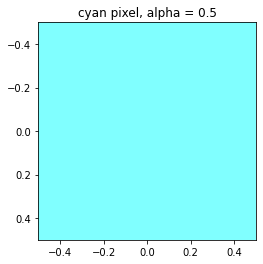

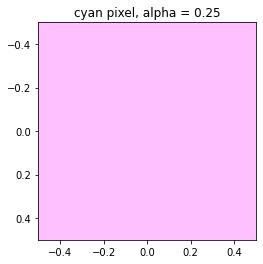

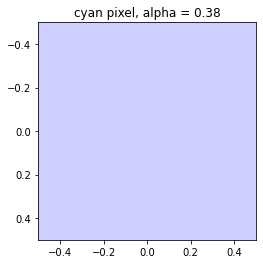

In [8]:
# generate a cyan pixel with alpha = 0.5, and a pink pixel with alpha = 0.25
alpha = 0.5
alpha2 = 0.25

pixel = [[np.array([0, 255, 255, math.floor(alpha*255)], dtype=np.uint8)]]
pixel2 = [[np.array([255, 0, 255, math.floor(alpha2*255)], dtype=np.uint8)]]
# pixel3 = the average of *pixel and *pixel2
pixel3 = np.floor(np.mean(np.array([pixel, pixel2]), axis=0)).astype(int)

print("pixel:", pixel, "\npixel2:", pixel2, "\npixel3:", pixel3)

# show the pixels with alpha channels

image_tools.show_image(pixel, axis=True, title="cyan pixel, alpha = {}".format(alpha), scale_ratio=1)
image_tools.show_image(pixel2, axis=True, title="cyan pixel, alpha = {}".format(alpha2), scale_ratio=1)
image_tools.show_image(pixel3, axis=True, title="cyan pixel, alpha = {}".format(round(np.mean(np.array([alpha, alpha2])), 2)), scale_ratio=1)

## Drawing polygons with alpha channels:

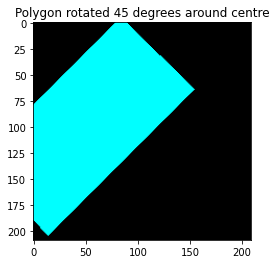

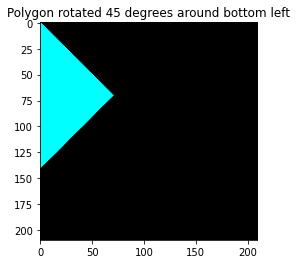

In [119]:
# create a blank canvas
canvas = np.zeros((300, 300, 4), np.uint8)
canvas[:, :, 3] = 255

# get the polygon image arrays
rot_45_poly_around_centre = draw_poly(new_points_45_around_center, origin=(0,0), colour=(0, 255, 255, 255))
rot_45_poly_around_bottom_left = draw_poly(new_points_45_around_bottom_left, colour=(0, 255, 255, 255))
rot_45_poly_around_bottom_right = draw_poly(new_points_45_around_bottom_right, colour=(0, 255, 255, 255))
rot_45_poly_around_top_right = draw_poly(new_points_45_around_top_right, colour=(0, 255, 255, 255))
rot_45_poly_around_top_left = draw_poly(new_points_45_around_top_left, colour=(0, 255, 255, 255))

# plot the polygons separately
image_tools.show_image(rot_45_poly_around_centre, axis=True, title="Polygon rotated 45 degrees around centre", scale_ratio=1)
image_tools.show_image(rot_45_poly_around_bottom_left, axis=True, title="Polygon rotated 45 degrees around bottom left", scale_ratio=1)
# image_tools.show_image(rot_45_poly_around_bottom_right, axis=True, title="Polygon rotated 45 degrees around bottom right", scale_ratio=1)
# image_tools.show_image(rot_45_poly_around_top_right, axis=True, title="Polygon rotated 45 degrees around top right", scale_ratio=1)
# image_tools.show_image(rot_45_poly_around_top_left, axis=True, title="Polygon rotated 45 degrees around top left", scale_ratio=1)

